# BISI CST2101 Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Q1: Import the necessary libraries and briefly explain the use of each library (1 Mark)

In [2]:
# remove _____ & write the appropriate library name

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Write your Answer here: 

Ans 1: 

 - NumPy is a powerful library for numerical operations in Python.
 - Pandas is a data manipulation and analysis library.
 - Seaborn is a statistical data visualization library based on Matplotlib
 - Matplotlib is a 2D plotting library for Python.

### Q2: Read the given dataset (1 Mark)

In [3]:
#remove _____ & write the appropriate function name

pima = pd.read_csv("diabetes.csv")

### Q3. Show the last 5 records of the dataset (1 Mark)

In [4]:
#remove ______ and write the appropriate number in the function

pima.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,2,173,79,32,474,35.504233,0.402867,21,1
996,13,132,70,30,111,35.271769,0.168845,42,1
997,3,132,87,44,156,34.794755,0.765003,29,1
998,0,140,0,0,0,41.926693,0.209833,28,1
999,4,93,59,35,93,45.914499,0.737636,29,1


### Q4. Show the first 5 records of the dataset (1 Mark)

In [5]:
#remove _____ & write the appropriate function name and the number of rows to get in the output

pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q5. Find the dimension of the `pima` dataframe. What do you understand by the dimension of the dataset? (1 Mark)

In [6]:
#remove _____ & write the appropriate function name

pima.shape

(1000, 9)

#### Write your Answer here: 


Ans 5:
We use the shape attribute to find out the structure of the dataframe, with this we understand that it has 1000 rows and 9 columns.

### Q6. Find the size of the `pima` dataframe. (1 Mark)

In [7]:
#remove _____ & write the appropriate function name

pima.size

9000

#### Write your Answer here: 


Ans 6:We use the size function to find out the total number of elements in the dataframe which is 9000.

### Q7. Display the data types of all the variables in the data set? (1 Mark)


In [8]:
#remove _____ & write the appropriate function name

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Q8. Are there any missing values in the `pima` dataframe?  Which variables have missing values? (1 Mark)

In [11]:
#remove _____ & write the appropriate function name

pima.isnull().values.any()

False

#### Write your Answer here: 


Ans 8: We use theisnull() function to find out if there are any missing values. We do not have any missing values as the boolean returned is false.

### Q9. Find the summary statistics for all variables except for  `'Outcome'` variable? Choose any one column/variable and explain all the statistical measures. (2 Marks)

In [55]:
#remove _____ & write the appropriate function name

pima.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [56]:
pima['Glucose'].describe()

count    1000.00000
mean      125.21600
std        32.27772
min         0.00000
25%       102.00000
50%       122.00000
75%       146.00000
max       199.00000
Name: Glucose, dtype: float64

#### Write your Answer here: 


Ans 9:

With respect to the Glucose column below are the stats:

- Count:Number of non-null values.
  Value: 1000.00000

- Mean: Average value of the 'Glucose' column.
  Value: 125.21600
  
- Standard Deviation (std):Measure of the amount of variation or dispersion in the column.
  Value: 32.27772
  
- Minimum (min):The smallest value in the column.
  Value: 0.00000
  
- 25th Percentile (Q1):Value below which 25% of the data falls in the column.
  Value: 102.00000
  
- 50th Percentile (Median or Q2):The middle value of the  column.
  Value: 122.00000
  
- 75th Percentile (Q3):Value below which 75% of the data falls in the column.
  Value: 146.00000
  
- Maximum (max):The largest value in the column.
  Value: 199.00000
  
- Name:The name of the Series (column) for which these statistics are calculated .

- dtype: float64:Data type of the values in the column (floating-point numbers).

### Q10. Plot the distribution plot for the variable `'BloodPressure'`. Write your observations from the plot. (2 Marks)

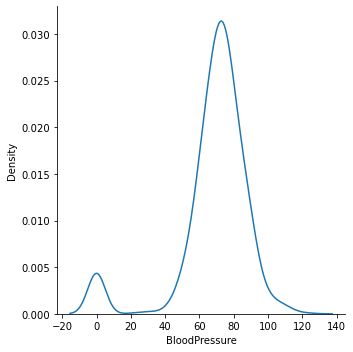

In [60]:
#remove _____ & write the appropriate library name

sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

#### Write your Answer here: 


Ans 10:

sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

Some key observations from the plot are as below:
-  Notable peaks are observed at blood pressure levels 0 and 70.
-  A distinct concentration of instances is evident at these specific blood pressure values.
-  The distribution appears bimodal, indicating the presence of distinct subgroups or patterns within the data.
-  The density values on the y-axis represent the concentration of data points at different blood pressure levels.
-  Higher density values indicate a higher concentration of instances in those specific blood pressure ranges.

### Q11. What is the `'BMI'` for the person having the highest `'Glucose'`? (1 Mark)

In [19]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

#### Write your Answer here: 


Ans 11:

pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

The result 661 42.9 Name: BMI, dtype: float64 indicates that the person with the highest 'Glucose' level in the dataset has a 'BMI' of 42.9. The index '661' corresponds to the row number or index

### Q12.
#### 12.1 What is the mean of the variable `'BMI'`? 
#### 12.2 What is the median of the variable `'BMI'`? 
#### 12.3 What is the mode of the variable `'BMI'`?
#### 12.4 Are the three measures of central tendency equal?

### (2 Marks)

In [ ]:
#remove _____ & write the appropriate function name

m1 = pima['BMI'].____()  #Mean
print(m1)
m2 = pima['BMI'].____()  #Median
print(m2)
m3 = pima['BMI'].____()[0]  #Mode
print(m3)

#### Write your Answer here: 


#Ans 12: 

The mean is 32.664772391408796, median is 32.8 and mode is 32.

12.1 Mean : 32.664772391408796
12.2 Median : 32.8
12.3 Mode : 32
12.4 Since these values are not exactly the same, the measures of central tendency are not equal in this dataset.


### Q13. How many women's `'Glucose'` level is above the mean level of `'Glucose'`? (1 Mark)

In [61]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

#### Write your Answer here: 


Ans 13:The missng function is mean and hence 449 women's Glucose level is above the mean level

### Q14. Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. Write you observations from the plot. (2 Marks)

In [4]:
#remove _____ & write the appropriate function and argument names
sns.______(data=pima, ___=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

#### Write your Answer here: 


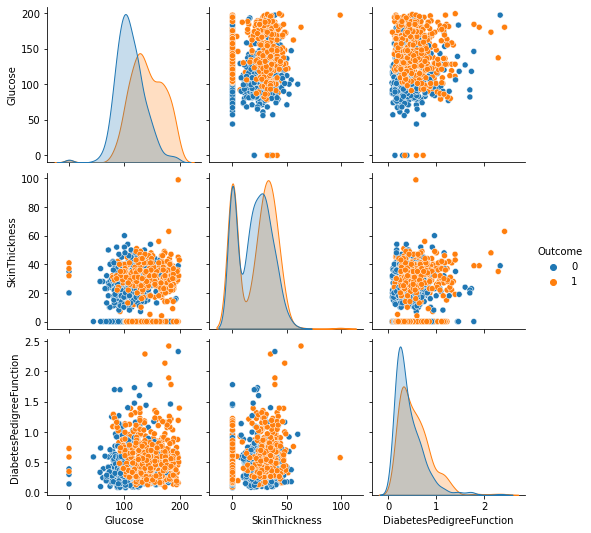

In [26]:
#Ans 14:
sns.pairplot(data=pima, vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

The three plots show the relationships between the features "Glucose," "SkinThickness," and "DiabetesPedigreeFunction" in different ways.

*1.Glucose Vs Skin thickness and Glucose Vs DiabetesPedigreeFunction* 
This plot shows the relationship between Glucose Vs Skin thickness and Glucose Vs DiabetesPedigreeFunction .
-There is a positive correlation between Glucose and Skin thickness, meaning that as glucose increases, so does skin thickness. This is likely because people with diabetes tend to have higher levels of glucose in their blood, which can lead to increased collagen production in the skin.
-Similarly there is a positive correlation between Glucose and DiabetesPedigreeFunction.

*2.Skin thickness Vs Glucose and  Skin thickness Vs Diabetespedigreefunction*
-This plot shows the relationship between Skin thickness Vs Glucose and  Skin thickness Vs Diabetes pedigree function. There is  a positive correlation between Skin thickness and  Glucose, meaning that as skin thickness  increases, so does glucose.
-Diabetes pedigree function is a measure of a person's genetic risk for developing diabetes. There is a negative correlation    between the two variables, meaning that as skin thickness increases, diabetes pedigree function decreases. This is because people with thicker skin tend to have lower levels of insulin sensitivity, which is a risk factor for diabetes.

*3.Diabetes pedigree function Vs Glucose and Diabetespedigreefunction Vs  Skin thickness*
-This plot shows the relationship between Diabetes pedigree function Vs Glucose and Diabetes pedigree function Vs  skin thickness . 
-There is a positive correlation between the two variables, meaning that as diabetes pedigree function increases, so does glucose . This is likely because people with diabetes tend to have both higher levels of glucose in their blood and a higher genetic risk for developing diabetes.
-However there is a negative correlation between Diabetes pedigree function and the skin thickness, meaning that as diabetes pedigree function increases, skin thickness decreases


### Q15. Plot the scatterplot between `'Glucose'` and `'Insulin'`. Write your observations from the plot. (1 Mark)

In [ ]:
#remove _____ & write the appropriate function name
sns.scatterplot(x='Glucose',y='Insulin',data=___)
plt.show(

#### Write your Answer here: 


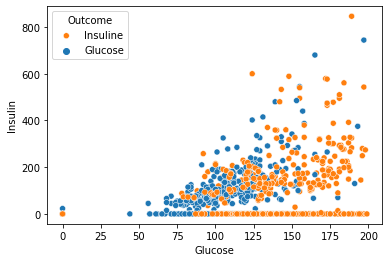

In [62]:
#Ans 15: the scatter plot indicates a generally weak positive correlation between glucose and insulin, with the presence of outliers or instances showing a different pattern.
sns.scatterplot(x='Glucose',y='Insulin',hue='Outcome', data=pima)
plt.legend(title='Outcome', labels=['Insuline', 'Glucose'])
plt.show()

1.The scatter plot you sent shows the relationship between Insulin levels and Blood glucose levels. There is a positive correlation between the two variables, meaning that as blood glucose levels increase, so do insulin levels. This is because insulin is a hormone that helps the body's cells to absorb glucose from the bloodstream. When blood glucose levels are high, the pancreas releases more insulin to try to lower them.

2.The plot also shows that there is a lot of variation in insulin levels at any given blood glucose level. This is because insulin levels are also influenced by other factors, such as diet, exercise, and stress.

3.Some additional insights from the plot:
-People with higher blood glucose levels also tend to have higher insulin levels. This is because their bodies are trying to compensate for the high blood glucose levels by producing more insulin.
-There is a wider range of insulin levels at higher blood glucose levels. This suggests that individual factors, such as insulin sensitivity and resistance, have a greater impact on insulin levels at higher blood glucose levels.
-There is a small group of people with high blood glucose levels but relatively low insulin levels. This may be due to insulin resistance, where the body's cells do not respond properly to insulin.

4.Overall, the plot suggests that blood glucose levels are a major determinant of insulin levels. However, it is important to note that other factors can also play a role in insulin secretion.

### Q16. Plot the boxplot for the 'Age' variable. Are there outliers? (1 Mark)

In [ ]:
#remove _____ & write the appropriate function and column name 
plt.______(pima['____'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Write your Answer here: 


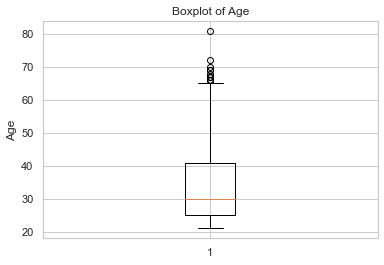

In [71]:
#Ans 16:The box plot shows the presence of outliers above the horizontal line.
plt.boxplot(pima['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In a boxplot, outliers are often identified as individual points that fall outside the whiskers of the boxplot. The whiskers typically extend to 1.5 times the interquartile range (IQR) below the first quartile (Q1) and above the third quartile (Q3). Any data point beyond this range is considered a potential outlier.As we can see all the datapoints beyond the whiskers are outliers.

### Q17. Find and visualize the the correlation matrix. Write your observations from the plot. (1 Mark)

#### Write your Answer here: 


In [78]:
#Ans 17:
plt.figure(figsize=(8,8))
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

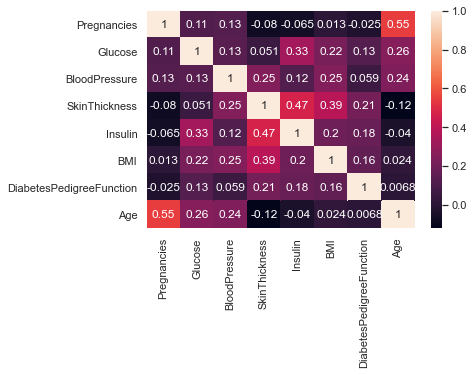

In [79]:
sns.heatmap(corr_matrix, annot = True)

The above correlation matrix, shows the correlation coefficients between the different features .
The correlation coefficient is a measure of how closely two variables are related to each other. A correlation coefficient of 1 indicates a perfect positive correlation, meaning that the two variables always move in the same direction. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that the two variables always move in opposite directions. A correlation coefficient of 0 indicates no correlation between the two variables.

*Positive Correlations*:

Pregnancies and Age:
Strong positive correlation (0.55), indicating that as the number of pregnancies increases, age tends to increase significantly.

Glucose and Age:
Moderate positive correlation (0.26), suggesting that glucose levels may increase with age.

BMI and Blood Pressure:
Moderate positive correlation (0.25), indicating a tendency for higher BMI to be associated with slightly higher blood pressure.

Insulin and Glucose:
Moderate positive correlation (0.33), suggesting a tendency for higher insulin levels in individuals with higher glucose levels.

*Negative Correlations*:

Pregnancies and Skin Thickness:
Negative correlation (-0.08), suggesting a slight tendency for individuals with more pregnancies to have thinner skin.

Insulin and Age:
Negative correlation (-0.04), indicating a slight tendency for insulin levels to decrease with age.

Skin Thickness and Age:
Negative correlation (-0.12), suggesting a slight tendency for skin thickness to decrease with age.

Insulin and BMI:
Negative correlation (-0.04), indicating a slight tendency for individuals with higher BMI to have slightly lower insulin levels.

## Model Training

### Q18. Split and scale the data (2 Mark)

In [36]:
# Split the data into dependent and independent variables
# remove _____ & write the appropriate function variable name
y = pima['Outcome']
x = pima.drop('Outcome', axis = 1)

In [37]:
# Using StandarScaler scale the data
# remove _____ & write the appropriate function function name

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [72]:
# Splitting the data into train and test. Use test size as 15%
# remove _____ & complete the code

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, stratify=y,  random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(850, 8)
(850,)
(150, 8)
(850,)


### Q19. Train a Logistic Regression Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [73]:
# remove _____ & complete the code

# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# fit the model on the train set
m = lr.fit(x_train, y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]

print(f'True Positives: {true_positives}')
print(f'True Negatives: {true_negatives}')

# Calculate Overall Accuracy
overall_accuracy = (true_positives + true_negatives) / sum(sum(conf_matrix))
# Print the results
print(f'Overall Accuracy: {overall_accuracy:.2f}')



Accuracy of Logistic Regression model on the train set: 0.76
Accuracy of the Logictic Regression model on the test set: 0.75
True Positives: 53
True Negatives: 60
Overall Accuracy: 0.75


#### Write your Answer here: 


Ans 19:

Accuracy of Logistic Regression model on the train set: 0.76
Accuracy of the Logictic Regression model on the test set: 0.75
True Positives: 53
True Negatives: 60
Overall Accuracy: 0.75

The Logistic Regression model achieved an accuracy of 75%. This accuracy reflects the proportion of correctly predicted instances in the total test set. Additionally, the model obtained 53 True Positives, indicating the number of instances correctly predicted as positive, and 60 True Negatives, signifying the number of instances correctly predicted as negative.

### Q20. Train a Random Forest Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [50]:
#remove _____ & complete the code

# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
conf_matrix_rf = confusion_matrix(y_test, y_pred2)


# Extract True Positives and True Negatives from the confusion matrix
true_positives_rf = conf_matrix_rf[1, 1]
true_negatives_rf = conf_matrix_rf[0, 0]

# Calculate Accuracy
Overall_accuracy_rf = (true_positives_rf + true_negatives_rf) / sum(sum(conf_matrix_rf))

# Print the results
print(f'True Positives: {true_positives_rf}')
print(f'True Negatives: {true_negatives_rf}')
print(f'Overall Accuracy: {accuracy_rf:.2f}')

Accuracy of Random Forest model on the train set: 0.81
Accuracy of Random Forest model on the test set: 0.79
True Positives: 63
True Negatives: 55
Overall Accuracy: 0.79


#### Write your Answer here: 

Ans 20:

Accuracy of Random Forest model on the train set: 0.81
Accuracy of Random Forest model on the test set: 0.79
True Positives: 63
True Negatives: 55
Overall Accuracy: 0.79

On the training set, the model achieves an accuracy of 81%, while on the test set, the accuracy slightly decreases to 79%. In terms of specific predictions, the model correctly identifies 63 instances of positive cases (True Positives) and accurately classifies 55 instances of negative cases (True Negatives). The overall accuracy, which considers both positive and negative predictions, remains consistent at 79%. The results indicate a reasonable predictive capability of the Random Forest model across different datasets.

### Q21. Which model performed better? (1 Mark)

#### Write your Answer here: 

Ans 21:

1.Overall Accuracy on the Test Set:
Random Forest: 0.79
Logistic Regression: 0.75
The Random Forest model has a higher overall accuracy on the test set, indicating that, in terms of the percentage of correct predictions, it performed better.

2.True Positives and True Negatives:
Random Forest True Positives: 63
Random Forest True Negatives: 55
Logistic Regression True Positives: 53
Logistic Regression True Negatives: 60
The Random Forest model achieved more True Positives and fewer True Negatives compared to the Logistic Regression model. This is crucial, especially in binary classification tasks, as it shows the Random Forest's ability to correctly identify positive instances.

3.Accuracy on the Training Set:
Random Forest: 0.81
Logistic Regression: 0.76
While training accuracy is not always a reliable indicator of model performance, a higher training accuracy suggests that the Random Forest model better fits the training data.

4.Comparison of Metrics:
The Random Forest model consistently outperformed the Logistic Regression model across multiple metrics.